In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import pandas as pd
from keras.layers import Bidirectional  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
file = "/content/drive/MyDrive/Dataset Flood Forecasting/stage_1965_2020_1007_station.txt"
f=open(file,"r")
lines=f.readlines()
result=[]
for x in lines:
    result.append(x.split(' '))
f.close()

'''/content/drive/MyDrive/Dataset Flood Forecasting (1)/stage_1965_2020_1007_station.txt'''

'/content/drive/MyDrive/Dataset Flood Forecasting (1)/stage_1965_2020_1007_station.txt'

In [ ]:
df=pd.DataFrame(result)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424
0,1965,1965,1965,1965,1965,1965,1965,1965,1965,1965,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020\n
1,1,1,1,1,1,1,1,1,1,1,...,11,11,11,11,11,11,11,11,12,12\n
2,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,1,2\n
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.7,25.7\n
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.45,26,26,26,26,26,26,26,26,26\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN\n
1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN\n
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72\n
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,265.15,265.15,265.15,265.15,265.15,265.23,265.23,265.23,265.23,265.23\n


In [ ]:
df = df.astype(float)
print(df.dtypes)

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
20420    float64
20421    float64
20422    float64
20423    float64
20424    float64
Length: 20425, dtype: object


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424
0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,...,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,12.00,12.00
2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00,1.00,2.00
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.70,25.70,25.70,25.70,25.70,25.70,25.70,25.70,25.70,25.70
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.45,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72,287.72
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,265.15,265.15,265.15,265.15,265.15,265.23,265.23,265.23,265.23,265.23


In [ ]:
index=[-3,-2,-1,76,91,218,223,240,370,439,444,450,457,690,698,713,804]

In [ ]:
df_new=[]
for i in index:
  df_new.append(df.iloc[i+3,:])
df_new=pd.DataFrame(df_new)

In [ ]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424
0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,1965.0,...,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00,2020.00
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,12.00,12.00
2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00,1.00,2.00
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,330.50,330.50,330.50,330.50,330.50,330.50,330.50,330.50,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,537.14,537.14,537.14,537.14,537.14,537.14,537.14,537.14,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.62,15.62,15.62,15.62,15.62,15.62,15.62,15.62,NaN,NaN
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.59,32.59,32.59,32.59,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_new.transpose().isnull().sum()

0         0
1         0
2         0
79     1353
94     3033
221    3265
226     893
243     892
373     589
442    1177
447    1165
453     813
460    3576
693     427
701     684
716    3782
807     632
dtype: int64

In [ ]:
df_new_mean = df_new.transpose()
df_new_mean=df_new_mean.fillna(df_new_mean.mean())
df_new_mean

,0,1,2,79,94,221,226,243,373,442,447,453,460,693,701,716,807
0,1965.0,1.0,1.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
1,1965.0,1.0,2.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
2,1965.0,1.0,3.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
3,1965.0,1.0,4.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
4,1965.0,1.0,5.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,2020.0,11.0,28.0,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.840000,158.830000,386.67000,97.760000
20421,2020.0,11.0,29.0,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.040000,143.840000,158.830000,386.67000,97.760000
20422,2020.0,11.0,30.0,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.880000,158.890000,386.67000,97.830000
20423,2020.0,12.0,1.0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,122.020000,143.880000,158.920000,386.67000,97.830000


In [ ]:
df_new_mean[0] = df_new_mean[0].astype(int)
df_new_mean[1] = df_new_mean[1].astype(int)
df_new_mean[2] = df_new_mean[2].astype(int)

In [ ]:
df_new_mean

,0,1,2,79,94,221,226,243,373,442,447,453,460,693,701,716,807
0,1965,1,1,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
1,1965,1,2,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
2,1965,1,3,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
3,1965,1,4,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
4,1965,1,5,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,2020,11,28,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.840000,158.830000,386.67000,97.760000
20421,2020,11,29,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.040000,143.840000,158.830000,386.67000,97.760000
20422,2020,11,30,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.880000,158.890000,386.67000,97.830000
20423,2020,12,1,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,122.020000,143.880000,158.920000,386.67000,97.830000


In [ ]:
df_new_mean["Date"]=pd.to_datetime(df_new_mean[0].astype(str) + '/' + df_new_mean[1].astype(str) + '/' + df_new_mean[2].astype(str))

In [ ]:
df_new_mean

,0,1,2,79,94,221,226,243,373,442,447,453,460,693,701,716,807,Date
0,1965,1,1,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-01
1,1965,1,2,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-02
2,1965,1,3,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-03
3,1965,1,4,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-04
4,1965,1,5,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,2020,11,28,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.840000,158.830000,386.67000,97.760000,2020-11-28
20421,2020,11,29,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.040000,143.840000,158.830000,386.67000,97.760000,2020-11-29
20422,2020,11,30,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.880000,158.890000,386.67000,97.830000,2020-11-30
20423,2020,12,1,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,122.020000,143.880000,158.920000,386.67000,97.830000,2020-12-01


In [ ]:
df_new_mean = df_new_mean.drop([0,1,2], axis =1)
df_new_mean

,79,94,221,226,243,373,442,447,453,460,693,701,716,807,Date
0,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-01
1,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-02
2,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-03
3,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-04
4,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,120.023594,140.361063,157.791272,383.35285,97.542844,1965-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20420,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.840000,158.830000,386.67000,97.760000,2020-11-28
20421,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.040000,143.840000,158.830000,386.67000,97.760000,2020-11-29
20422,541.389794,223.813039,330.500000,537.140000,86.47927,15.620000,32.251316,125.59000,70.948587,122.030000,143.880000,158.890000,386.67000,97.830000,2020-11-30
20423,541.389794,223.813039,324.514166,526.717861,86.47927,15.177383,32.251316,124.99271,70.948587,122.020000,143.880000,158.920000,386.67000,97.830000,2020-12-01


In [ ]:
series = pd.DataFrame().assign(station=df_new_mean[226], Date=df_new_mean['Date'])
series

,station,Date
0,526.717861,1965-01-01
1,526.717861,1965-01-02
2,526.717861,1965-01-03
3,526.717861,1965-01-04
4,526.717861,1965-01-05
...,...,...
20420,537.140000,2020-11-28
20421,537.140000,2020-11-29
20422,537.140000,2020-11-30
20423,526.717861,2020-12-01


In [ ]:
series = series.set_index(['Date'])

#LSTM

In [ ]:
# date-time parsing function for loading the dataset
from tensorflow.keras.layers import Dropout
def parser(x):
	return datetime.strptime(x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(Bidirectional(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True)))
	model.add(Dropout(0.5))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [ ]:
# # load dataset
# series = read_csv('/content/drive/MyDrive/Dataset Flood Forecasting/Average Data/stage_mean.csv', index_col='Date')

In [ ]:
series

,station
Date,
1965-01-01,526.717861
1965-01-02,526.717861
1965-01-03,526.717861
1965-01-04,526.717861
1965-01-05,526.717861
...,...
2020-11-28,537.140000
2020-11-29,537.140000
2020-11-30,537.140000


In [ ]:
series.head()

,station
Date,
1965-01-01,526.717861
1965-01-02,526.717861
1965-01-03,526.717861
1965-01-04,526.717861
1965-01-05,526.717861


In [ ]:
series.shape

(20425, 1)

In [ ]:
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

In [ ]:
raw_values

array([[526.71786146],
       [526.71786146],
       [526.71786146],
       ...,
       [537.14      ],
       [526.71786146],
       [526.71786146]])

In [ ]:
diff_values

0                        [0.0]
1                        [0.0]
2                        [0.0]
3                        [0.0]
4                        [0.0]
                 ...          
20419                    [0.0]
20420                    [0.0]
20421                    [0.0]
20422    [-10.422138541880031]
20423                    [0.0]
Length: 20424, dtype: object

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [ ]:
supervised

,0,0
0,0,[0.0]
1,[0.0],[0.0]
2,[0.0],[0.0]
3,[0.0],[0.0]
4,[0.0],[0.0]
...,...,...
20419,[0.0],[0.0]
20420,[0.0],[0.0]
20421,[0.0],[0.0]
20422,[0.0],[-10.422138541880031]


In [ ]:
print(supervised_values)

[[0 array([0.])]
 [array([0.]) array([0.])]
 [array([0.]) array([0.])]
 ...
 [array([0.]) array([0.])]
 [array([0.]) array([-10.42213854])]
 [array([-10.42213854]) array([0.])]]


In [ ]:
supervised_values.shape

(20424, 2)

In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:12783], supervised_values[12783:16436]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
train.shape

(12783, 2)

In [ ]:
import matplotlib.pyplot as plt

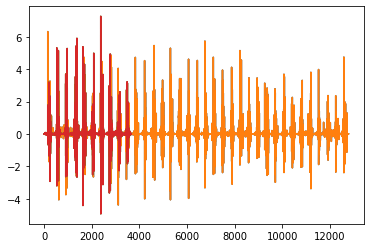

In [ ]:
plt.plot(train)
plt.plot(test)
plt.show()

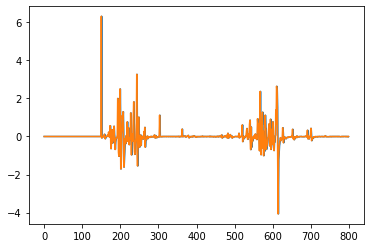

In [ ]:
plt.plot(train[:800])

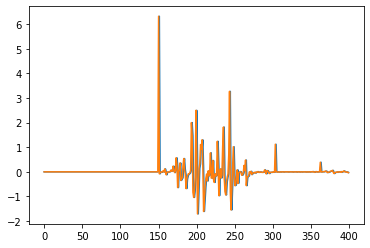

In [ ]:
plt.plot(train[:400])

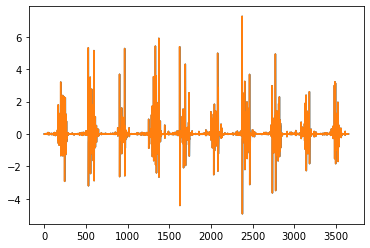

In [ ]:
plt.plot(test)

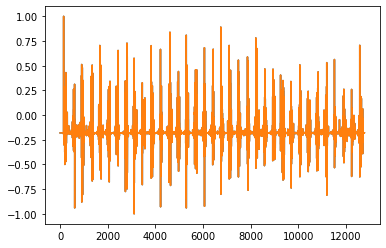

In [ ]:
plt.plot(train_scaled)

In [ ]:
len(train_scaled)

12783

In [ ]:
len(test_scaled)

3653

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 128)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()

In [ ]:
expected=[]
predictions.clear()
expected.clear()

In [ ]:

for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected.append(raw_values[len(train) + i + 1])
	expected_temp = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected_temp))

Month=1, Predicted=534.017509, Expected=533.700000
Month=2, Predicted=533.994857, Expected=533.700000
Month=3, Predicted=533.958664, Expected=533.690000
Month=4, Predicted=533.935271, Expected=533.690000
Month=5, Predicted=533.928968, Expected=533.690000
Month=6, Predicted=533.927571, Expected=533.680000
Month=7, Predicted=533.984809, Expected=533.680000
Month=8, Predicted=534.108592, Expected=533.680000
Month=9, Predicted=534.197212, Expected=533.680000
Month=10, Predicted=534.176526, Expected=533.690000
Month=11, Predicted=534.127986, Expected=533.690000
Month=12, Predicted=534.063074, Expected=533.680000
Month=13, Predicted=534.021351, Expected=533.680000
Month=14, Predicted=533.995454, Expected=533.680000
Month=15, Predicted=533.964285, Expected=533.670000
Month=16, Predicted=533.921727, Expected=533.690000
Month=17, Predicted=533.929758, Expected=533.690000
Month=18, Predicted=533.899783, Expected=533.670000
Month=19, Predicted=533.846754, Expected=533.670000
Month=20, Predicted=5

In [ ]:
len(expected)

3653

In [ ]:
len(predictions)

3653

In [ ]:
# report performance
rmse = sqrt(mean_squared_error(expected, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 151.950


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [ ]:
mse_val = mse(expected, predictions)
print('Test MSE: %.3f' % mse_val)

Test MSE: 23088.868


In [ ]:
mae_val = mae(expected, predictions)
print('Test MAE: %.3f' % mae_val)

Test MAE: 45.990


In [ ]:
R2 = r2(expected, predictions)
print('Test R2 score : %.3f' %R2)

Test R2 score : -16011.673


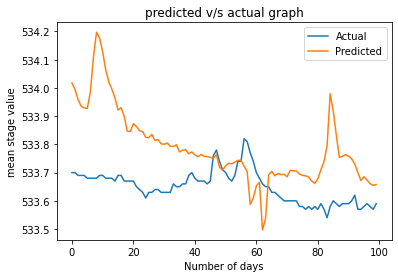

In [ ]:
# line plot of observed vs predicted
pyplot.xlabel("Number of days")
pyplot.ylabel("mean stage value")
pyplot.title("predicted v/s actual graph")
pyplot.plot(expected[:100],label="Actual")
pyplot.plot(predictions[:100],label="Predicted")
plt.legend()
pyplot.plot()
pyplot.show()

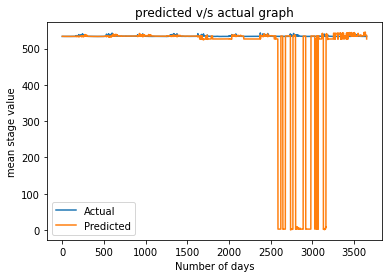

In [ ]:
# line plot of observed vs predicted
pyplot.xlabel("Number of days")
pyplot.ylabel("mean stage value")
pyplot.title("predicted v/s actual graph")
pyplot.plot(expected,label="Actual")
pyplot.plot(predictions,label="Predicted")
plt.legend()
pyplot.plot()
pyplot.show()

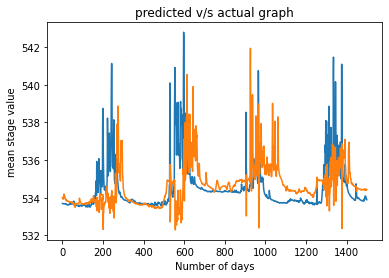

In [ ]:
pyplot.xlabel("Number of days")
pyplot.ylabel("mean stage value")
pyplot.title("predicted v/s actual graph")
pyplot.plot(expected[:1500])
pyplot.plot(predictions[:1500])
pyplot.plot()
pyplot.show()